# Create a Mapping from 1-D Reduced Spectrum to 2-D Reduced Spectrum

In [112]:
import astropy.io.fits as fits
import matplotlib.pylab as plt
import numpy as np
import glob
import pickle
import pandas as pd

Make a dictionary mapping every star to its 2-D spectrum file.

In [113]:
list_2d_files = []
for file in glob.glob('/datag/blpd0/datax/apf/*'):
    if '.fits' in file and 'ucb' in file:
        list_2d_files += [file]

In [114]:
# ONLY DO THIS ONCE
# create dictionary and save it

# spect_dict = {}

# for file in list_2d_files:
#     star = fits.open(file)[0].header['TOBJECT']
#     if star in spect_dict:
#         file_list = spect_dict[star] + [file]
#         spect_dict[star] = file_list
#     else:
#         spect_dict[star] = [file]

# f = open('/home/zoek/code/APF-BL-DAP/Zoe/SpectraMapping/spect2d.pkl','wb')
# pickle.dump(spect_dict,f)
# f.close()

In [115]:
# read in dictionary
spect_dict = pd.read_pickle(r'/home/zoek/code/APF-BL-DAP/Zoe/SpectraMapping/spect2d.pkl')

In [116]:
def find_location_of_closest_val(val, array, round_by = 7):
    '''given a wavelength value, find the indicies that give its location in wl_image
    returns order #, pixel #'''
    rounded_val = np.round(val, round_by)
    for sub_array in array:
        rounded_sub_array = np.round(sub_array, round_by)
        if rounded_val in rounded_sub_array:
            return(array.tolist().index(sub_array.tolist()), rounded_sub_array.tolist().index(rounded_val))

# Test

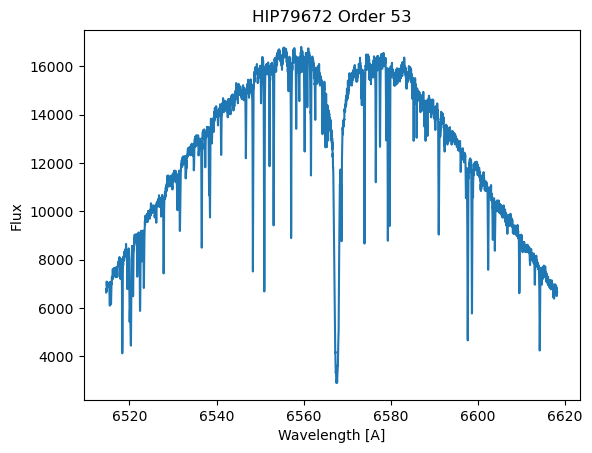

6567.513562296674


In [117]:
APF_wavelength_path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/APFTutorial/apf_wav.fits'
wl_file = fits.open(APF_wavelength_path)
wl_image = wl_file[0].data

apf_1d = fits.open('/datag/blpd0/datax/apf/rbyk.087.fits')
image_1d = apf_1d[0].data
star = apf_1d[0].header['TOBJECT']

order = 53
wl = wl_image[order]
flux = image_1d[order]
fl = flux[1:]

plt.plot(wl[:-100], fl[:-100])
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title(star + ' Order ' + str(order))
plt.show()

H_alpha_wl = wl[np.argmin(fl[:-100])]
print(H_alpha_wl)

In [118]:
H_alpha_indicies = find_location_of_closest_val(H_alpha_wl, wl_image)
print('H_alpha_wl is located at ' + str(H_alpha_indicies) + ' in the wavelength array')
print('at ' + str(wl_image[H_alpha_indicies]) + str(' A'))

H_alpha_wl is located at (53, 2014) in the wavelength array
at 6567.513562296674 A


In [119]:
text = open('/mnt_home/zoek/code/APF-BL-DAP/Zoe/SpectraMapping/order_coefficients.txt', "r")
lines = text.read().splitlines()
coeff_array = np.zeros((79,5))
for i in range(len(lines)):
    a0 = float(lines[i][6:13].strip())
    a1 = float(lines[i][17:26].strip())
    a2 = float(lines[i][27:39].strip())
    a3 = float(lines[i][40:52].strip())
    a4 = float(lines[i][54:].strip())
    coeffs_one_line = np.array([a0,a1,a2,a3,a4])
    coeff_array[i] += coeffs_one_line

In [120]:
apf_2d = fits.open('/datag/blpd0/datax/apf/ucb-byk087.fits')
image_2d = apf_2d[0].data
image_rot = np.rot90(image_2d)
image_flip = np.fliplr(image_rot)
star = apf_2d[0].header['TOBJECT']

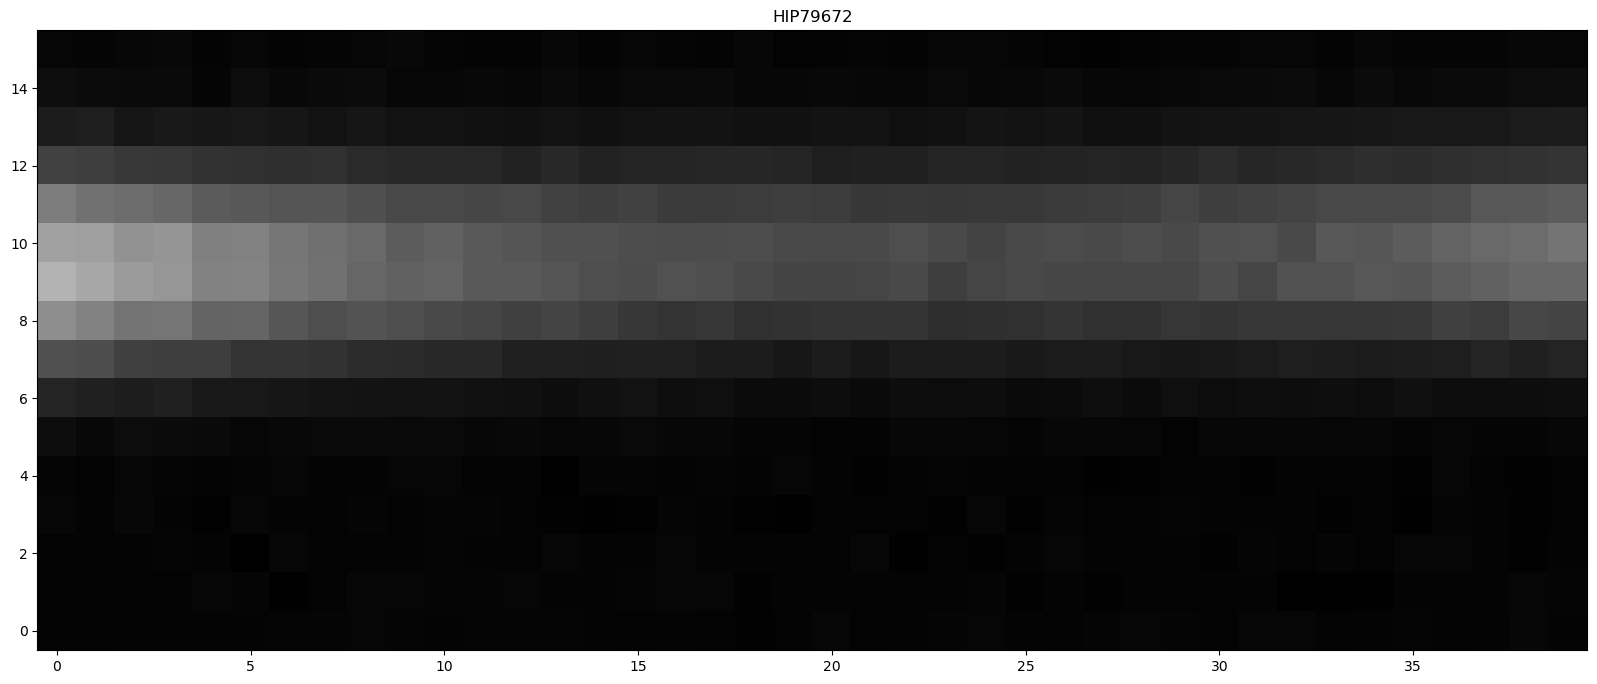

In [123]:
order = 53
pixel = 2014

a0 = coeff_array[order,0]
a1 = coeff_array[order,1]
a2 = coeff_array[order,2]
a3 = coeff_array[order,3]
a4 = coeff_array[order,4]

y = a0 + a1*pixel + a2*pixel**2 + a3*pixel**3 + a4*pixel**4
y = int(y)

new_image = image_flip[y-8:y+8,pixel-20:pixel+20] 
# y coords, then x coords

plt.figure(figsize=(20,20))
plt.imshow(new_image, cmap = 'gray', 
           vmin = np.min(new_image), 
           vmax = np.max(new_image) * 1.2, origin = 'lower')
plt.title(star)
plt.show()

# Map Specmatch Spectrum to order and pixel in APF spectrum

In [124]:
directory = '/home/zoek/code/APF-BL-DAP/Zoe/Results/HIP100017'

In [125]:
star = 'HIP100017'
wl_detect = 5634.53

In [126]:
APF_wavelength_path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/APFTutorial/apf_wav.fits'
wl_file = fits.open(APF_wavelength_path)
wl_image = wl_file[0].data

In [127]:
# find order and pixel in apf 1-d wl array
order, pixel = find_location_of_closest_val(wl_detect, wl_image, round_by = 2)

In [128]:
# find corresponding 2-D spectrum
spect2d = spect_dict[star]

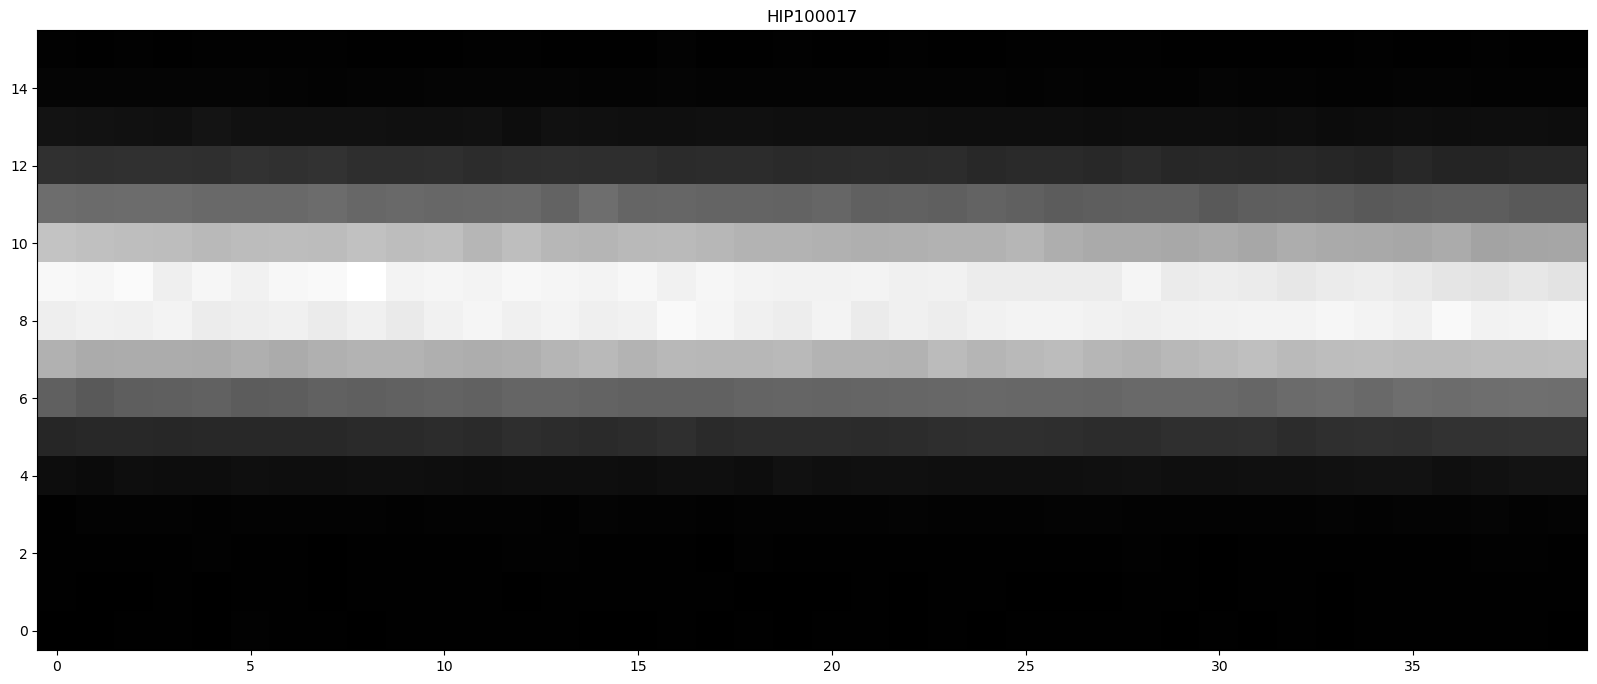

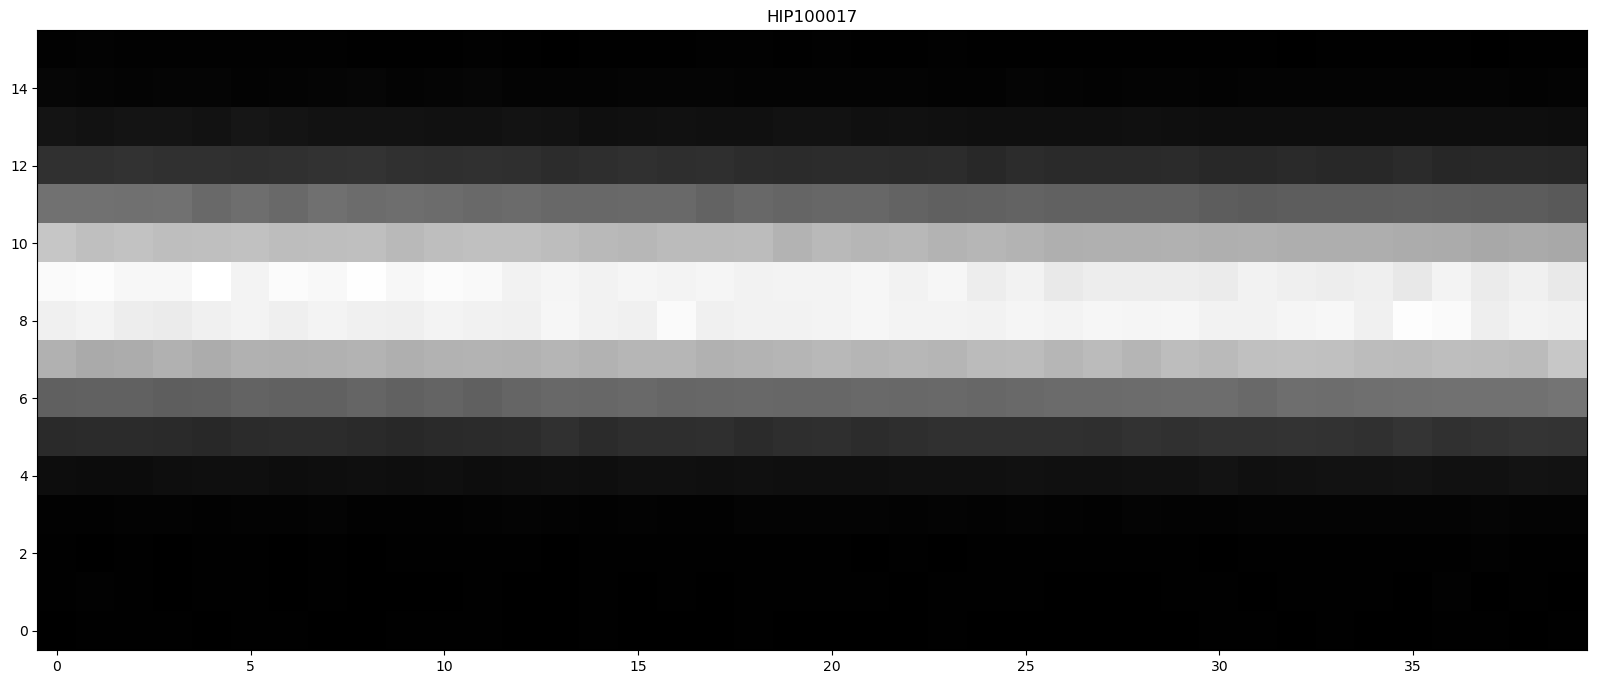

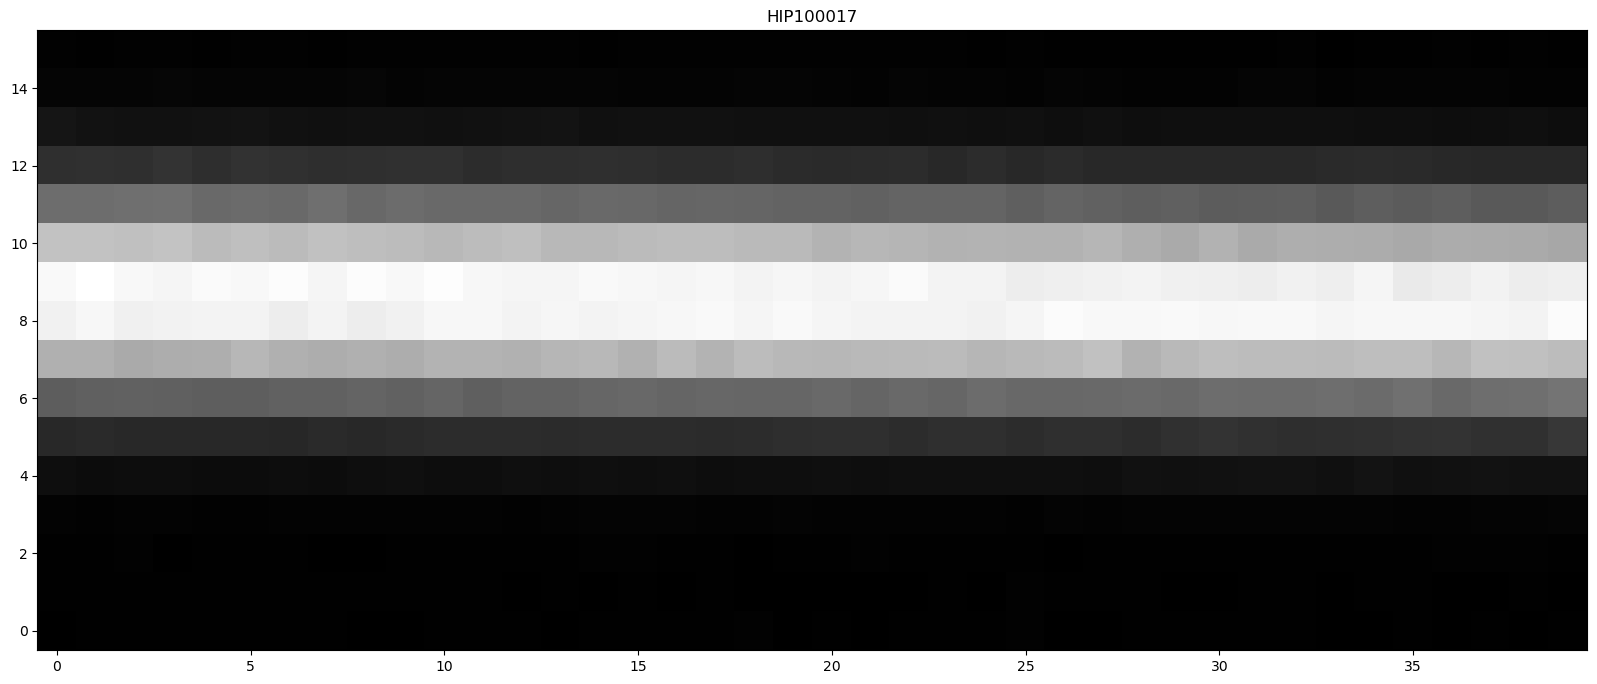

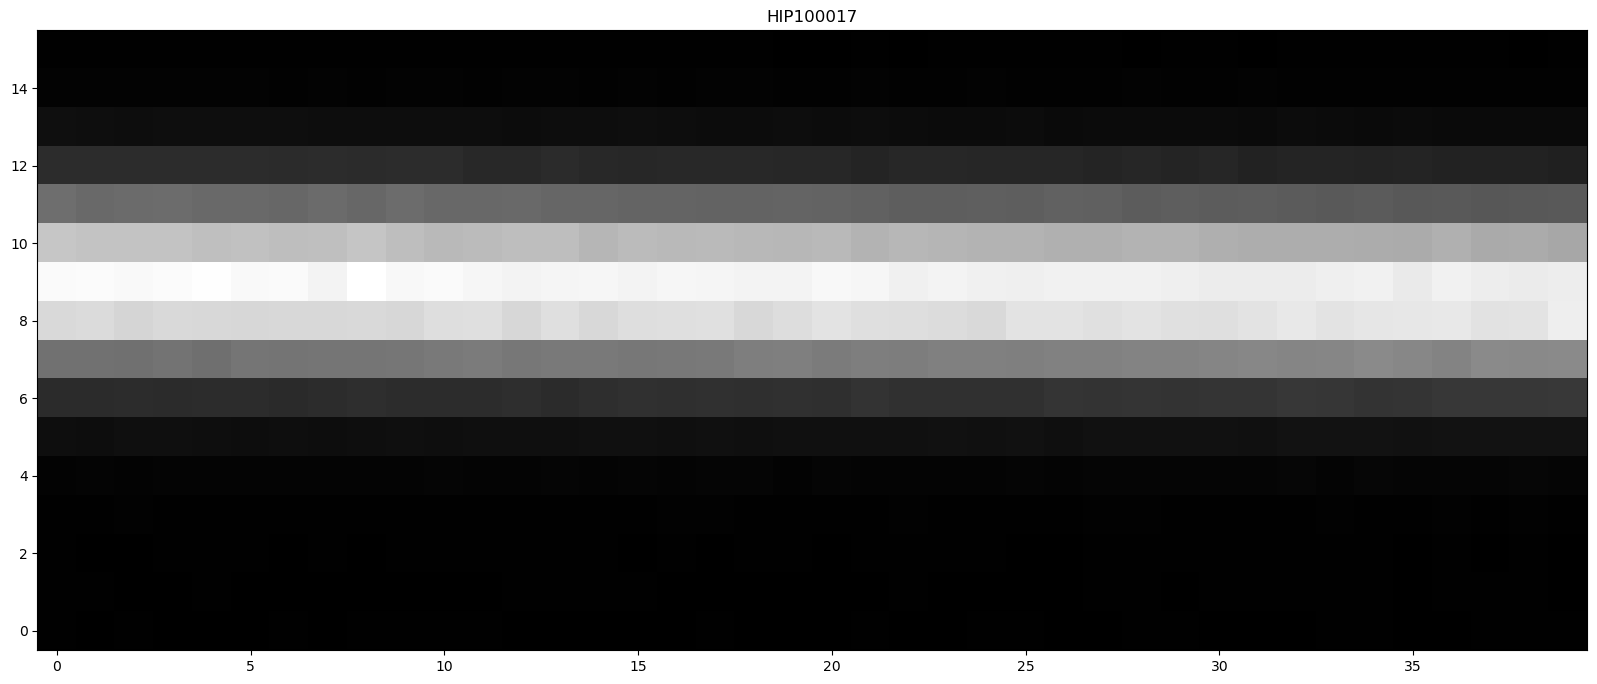

In [131]:
for file in spect2d:
    apf_2d = fits.open(file)
    image_2d = apf_2d[0].data
    image_rot = np.rot90(image_2d)
    image_flip = np.fliplr(image_rot)
    star = apf_2d[0].header['TOBJECT']
    
    a0 = coeff_array[order,0]
    a1 = coeff_array[order,1]
    a2 = coeff_array[order,2]
    a3 = coeff_array[order,3]
    a4 = coeff_array[order,4]

    y = a0 + a1*pixel + a2*pixel**2 + a3*pixel**3 + a4*pixel**4
    y = int(y)

    new_image = image_flip[y-8:y+8,pixel-20:pixel+20] 
    # y coords, then x coords

    plt.figure(figsize=(20,20))
    plt.imshow(new_image, cmap = 'gray', 
               vmin = np.min(new_image), 
               vmax = np.max(new_image), origin = 'lower')
    plt.title(star)
    plt.show()

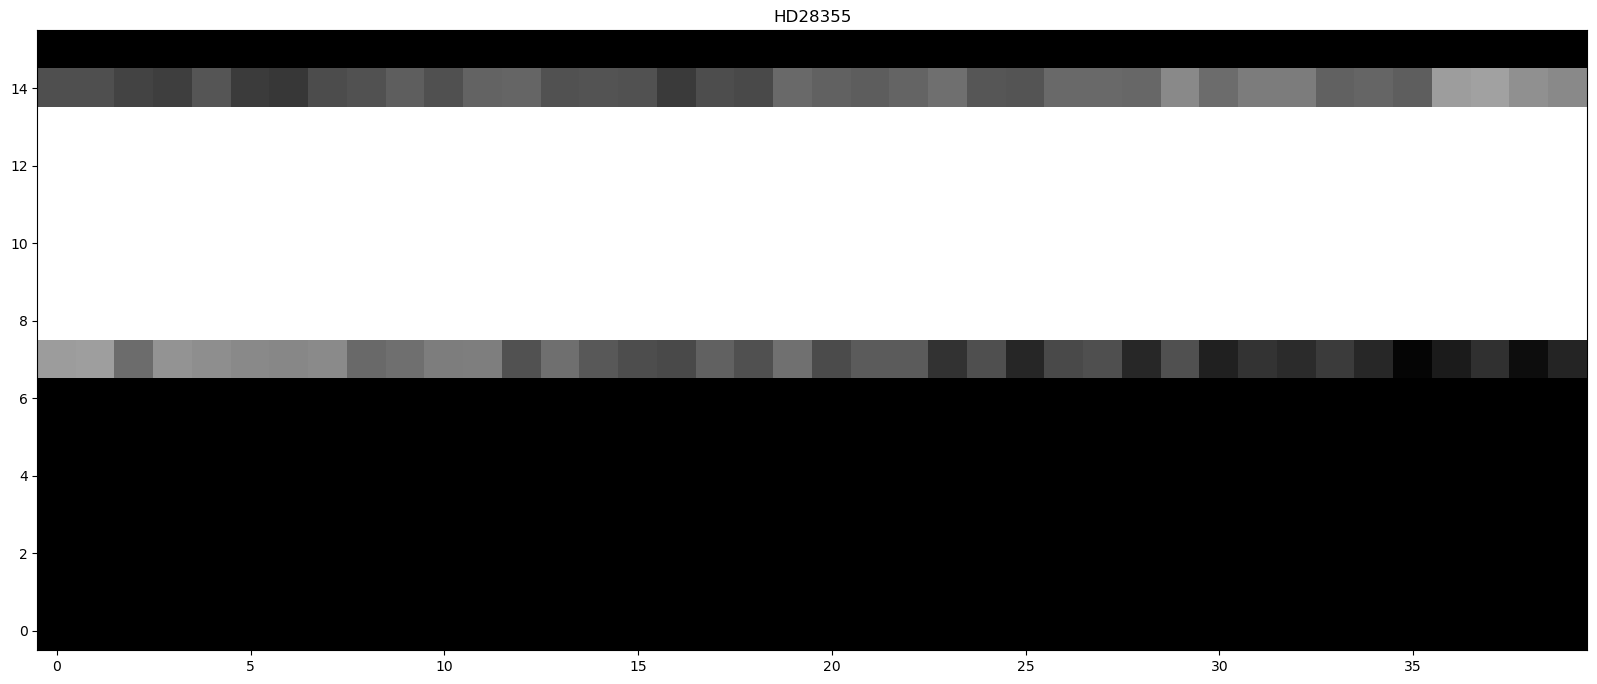